# Effect of freestream turbulence (velocity variations) (problem from Petter Krus) 

### Choose a sinusoidal motion as a baseline. Case 3A from JFM paper

In [6]:
include("../src/UNSflow.jl")

UNSflow

In [7]:
using UNSflow

In [40]:
#This repeoduces results from Case 3A in Ramesh et al. (2014)                                                                
alpha_mean = 4*pi/180.
alpha_amp = 22.5*pi/180.
k = 3.93
h_amp = 0.05
phi = 90*pi/180

w = 2*k #Frequency                                                                                                           
T = (2*pi/w) #Period   
ncyc = 4 # Number of cycles
t_tot = ncyc*T  #Desired total time                                                                                             
dt = 0.015*0.2*4/k #time step calculation                                                                                    


#CosDef arguments are mean, amplitude, k (red. freq.), phase (all in radians)                                                
alphadef = CosDef(alpha_mean, alpha_amp, w, phi)
hdef = CosDef(0., h_amp, w, 0.)
udef = ConstDef(1.)
full_kinem = KinemDef(alphadef, hdef, udef)

pvt = 0.75

lespcrit = [0.15;]

nsteps =round(Int,t_tot/dt)+1

1048

In [41]:
surf = TwoDSurf(1., 1., "FlatPlate", pvt, 70, 35, "Prescribed", full_kinem, lespcrit)

curfield = TwoDFlowField() #No disturbances in external flowfield

UNSflow.TwoDFlowField(UNSflow.ConstDef(0.0),UNSflow.ConstDef(0.0),[0.0],[0.0],UNSflow.TwoDVort[],UNSflow.TwoDVort[])

In [42]:
mat_baseline, surf_baseline, curfield_baseline = ldvm(surf, curfield, nsteps, dt)

(
1048x8 Array{Float64,2}:
 0.00305344   0.0603893   0.0499856  …  432.416     26.0034     209.129  
 0.00610687   0.0509709   0.0499424       0.214874  -0.130603     7.6758 
 0.00916031   0.0415633   0.0498705       4.02618    0.0259335   10.1667 
 0.0122137    0.0321719   0.0497698       5.51246    0.0359522   10.6684 
 0.0152672    0.0228023   0.0496404       4.84999   -0.0308093    9.79245
 0.0183206    0.0134597   0.0494825  …    4.48571   -0.0810153    7.76911
 0.021374     0.00414963  0.0492961       4.4778    -0.122803     6.51946
 0.0244275   -0.00512266  0.0490812       4.37735   -0.163808     5.76333
 0.0274809   -0.0143518   0.0488381       4.16849   -0.201227     5.41279
 0.0305344   -0.0235324   0.0485669       3.84805   -0.231993     5.32317
 0.0335878   -0.0326593   0.0482677  …    3.41724   -0.253102     5.26623
 0.0366412   -0.0417272   0.0479407       2.90958   -0.262985     5.09169
 0.0396947   -0.0507308   0.0475861       2.37323   -0.262064     4.75617
 ⋮         

In [18]:
using PyPlot

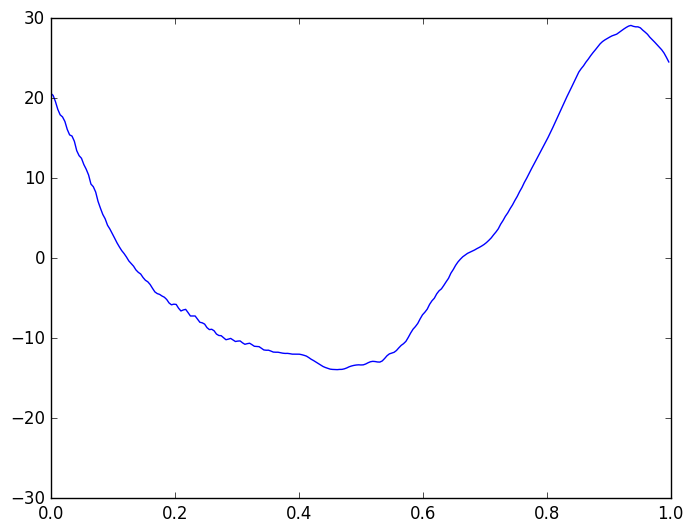

4-element Array{Int64,1}:
   0
   1
 -30
  30

In [43]:
mat = mat_baseline
range = round(Int,(ncyc-1)*nsteps/ncyc)+1:nsteps
tbyT = (mat[range,1]-mat[range[1]])/T
plot(tbyT,mat[range,6])
axis([0, 1, -30, 30])


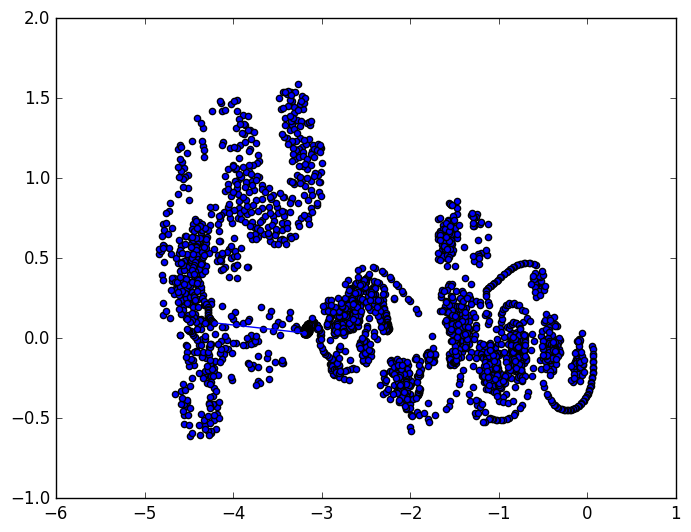

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31c250190>

In [44]:
surf = surf_baseline
curfield = curfield_baseline
view_vorts(surf, curfield)

### Now let's try introducing some turbulence


In [45]:
# Vertical oscillation at ten times the frequency of motion, amplitude of 5% freestream velocity
wdef = SinDef(0., 0.05, 10*w, 0.)
udef = ConstDef(0.)

surf = TwoDSurf(1., 1., "FlatPlate", pvt, 70, 35, "Prescribed", full_kinem, lespcrit)

curfield = TwoDFlowField(udef, wdef) #No disturbances in external flowfield



UNSflow.TwoDFlowField(UNSflow.ConstDef(0.0),UNSflow.SinDef(0.0,0.05,78.60000000000001,0.0),[0.0],[0.0],UNSflow.TwoDVort[],UNSflow.TwoDVort[])

In [46]:
mat_case1, surf_case1, curfield_case1 = ldvm(surf, curfield, nsteps, dt)

(
1048x8 Array{Float64,2}:
 0.00305344   0.0603893   0.0499856  …  438.844      26.3921     210.921  
 0.00610687   0.0509709   0.0499424       6.32484     0.181097     9.46738
 0.00916031   0.0415633   0.0498705       9.53819     0.255163    11.8827 
 0.0122137    0.0321719   0.0497698      10.1028      0.183682    12.3139 
 0.0152672    0.0228023   0.0496404       8.16518     0.0447978   11.108  
 0.0183206    0.0134597   0.0494825  …    6.40338    -0.0552025    8.57872
 0.021374     0.00414963  0.0492961       4.90332    -0.121037     6.79422
 0.0244275   -0.00512266  0.0490812       3.2936     -0.158257     5.51527
 0.0274809   -0.0143518   0.0488381       1.64386    -0.164991     4.73545
 0.0305344   -0.0235324   0.0485669       0.0158456  -0.141795     4.3158 
 0.0335878   -0.0326593   0.0482677  …   -1.51779    -0.0918707    3.97649
 0.0366412   -0.0417272   0.0479407      -2.85113    -0.0224673    3.5464 
 0.0396947   -0.0507308   0.0475861      -3.87838     0.0553572    3.0015

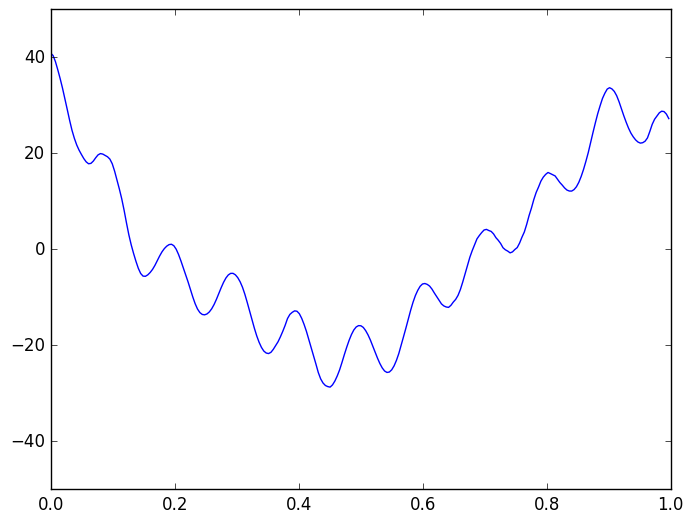

4-element Array{Int64,1}:
   0
   1
 -50
  50

In [49]:
mat = mat_case1
range = round(Int,(ncyc-1)*nsteps/ncyc)+1:nsteps
tbyT = (mat[range,1]-mat[range[1]])/T
plot(tbyT,mat[range,6])
axis([0, 1, -50, 50])



In [62]:
mean(mat_baseline[range,6]), mean(mat_baseline[range,6]./mat_baseline[range,7])


(2.1603403111245885,-26.202782105927568)

In [63]:
mean(mat_case1[range,6]), mean(mat_case1[range,6]./mat_case1[range,7])

(0.6818489355396228,-0.7269672154401029)

### The turbulence seems to reduce performance. 


In [64]:
# See the effect of phase angle
wdef = SinDef(0., 0.05, 10*w, 90.*pi/180)
udef = ConstDef(0.)

surf = TwoDSurf(1., 1., "FlatPlate", pvt, 70, 35, "Prescribed", full_kinem, lespcrit)

curfield = TwoDFlowField(udef, wdef) #No disturbances in external flowfield

UNSflow.TwoDFlowField(UNSflow.ConstDef(0.0),UNSflow.SinDef(0.0,0.05,78.60000000000001,1.5707963267948966),[0.0],[0.0],UNSflow.TwoDVort[],UNSflow.TwoDVort[])

In [65]:
mat_case2, surf_case2, curfield_case2 = ldvm(surf, curfield, nsteps, dt)

(
1048x8 Array{Float64,2}:
 0.00305344   0.0603893   0.0499856  1.0  …  458.684     27.5917    216.455  
 0.00610687   0.0509709   0.0499424  1.0      -1.89436   -0.238206    7.45116
 0.00916031   0.0415633   0.0498705  1.0       0.741498  -0.110667    9.60323
 0.0122137    0.0321719   0.0497698  1.0       1.0521    -0.107596    9.76893
 0.0152672    0.0228023   0.0496404  1.0      -0.620171  -0.155563    8.35329
 0.0183206    0.0134597   0.0494825  1.0  …   -1.56007   -0.162395    5.95929
 0.021374     0.00414963  0.0492961  1.0      -1.82061   -0.148939    4.51859
 0.0244275   -0.00512266  0.0490812  1.0      -1.82194   -0.132051    3.73555
 0.0274809   -0.0143518   0.0488381  1.0      -1.58537   -0.118643    3.52345
 0.0305344   -0.0235324   0.0485669  1.0      -1.14486   -0.114476    3.67186
 0.0335878   -0.0326593   0.0482677  1.0  …   -0.532773  -0.124052    3.9058 
 0.0366412   -0.0417272   0.0479407  1.0       0.234615  -0.151301    4.0687 
 0.0396947   -0.0507308   0.0475861  

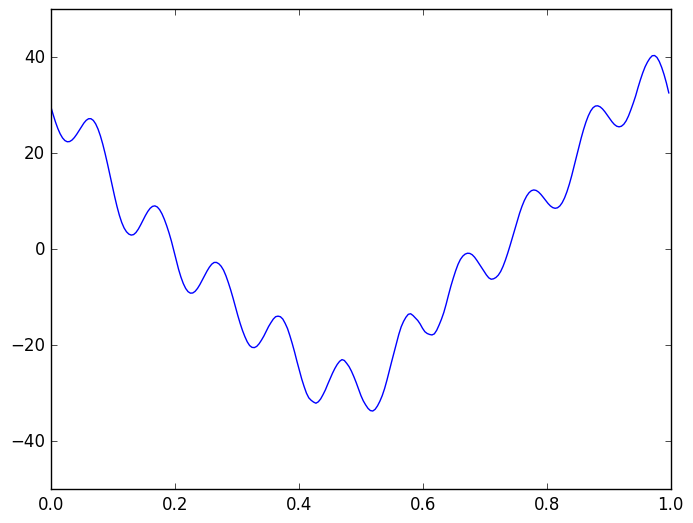

4-element Array{Int64,1}:
   0
   1
 -50
  50

In [66]:
mat = mat_case2
range = round(Int,(ncyc-1)*nsteps/ncyc)+1:nsteps
tbyT = (mat[range,1]-mat[range[1]])/T
plot(tbyT,mat[range,6])
axis([0, 1, -50, 50])

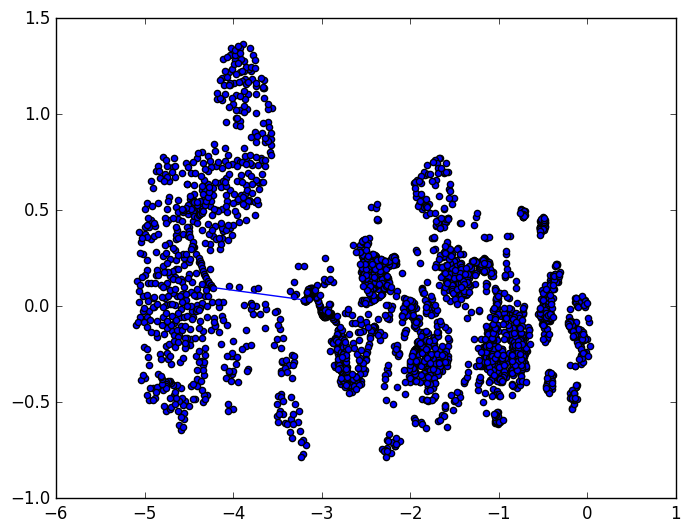

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31c127e50>

In [67]:
surf = surf_case2
curfield = curfield_case2
view_vorts(surf, curfield)

In [68]:
mean(mat_case2[range,6]), mean(mat_case2[range,6]./mat_case2[range,7])

(0.30641460044868907,0.2592917718151129)

### Problem in "Aircraft Design Automation and Subscale Testing", by David Lundstrom. 

Airfoil is at a steady angle of attack and subject to freestream turbulence


In [86]:
alphadef = ConstDef(5*pi/180)
hdef = ConstDef(0.)
udef = ConstDef(1.)
full_kinem = KinemDef(alphadef, hdef, udef)

pvt = 0.0

lespcrit = [0.1;] #Assume

t_tot = 10.
dt = 0.015

nsteps =round(Int,t_tot/dt)+1

668

In [87]:
surf = TwoDSurf(1., 1., "FlatPlate", pvt, 70, 35, "Prescribed", full_kinem, lespcrit)

curfield = TwoDFlowField() #No disturbances in external flowfield

UNSflow.TwoDFlowField(UNSflow.ConstDef(0.0),UNSflow.ConstDef(0.0),[0.0],[0.0],UNSflow.TwoDVort[],UNSflow.TwoDVort[])

In [88]:
mat_baseline, surf_baseline, curfield_baseline = ldvm(surf, curfield, nsteps, dt)

(
668x8 Array{Float64,2}:
  0.015  0.0872665  0.0  1.0  0.0442579  9.70496   0.83672     -4.4864   
  0.03   0.0872665  0.0  1.0  0.044603   0.306113  0.0142337   -0.0913623
  0.045  0.0872665  0.0  1.0  0.0450009  0.362101  0.0189072   -0.155511 
  0.06   0.0872665  0.0  1.0  0.0453728  0.345567  0.0172487   -0.134327 
  0.075  0.0872665  0.0  1.0  0.0457335  0.34229   0.0167547   -0.128638 
  0.09   0.0872665  0.0  1.0  0.046083   0.338869  0.016253    -0.12295  
  0.105  0.0872665  0.0  1.0  0.046423   0.336628  0.0158586   -0.118702 
  0.12   0.0872665  0.0  1.0  0.0467543  0.335124  0.0155323   -0.115346 
  0.135  0.0872665  0.0  1.0  0.047078   0.334171  0.0152573   -0.112655 
  0.15   0.0872665  0.0  1.0  0.0473944  0.333624  0.0150209   -0.110455 
  0.165  0.0872665  0.0  1.0  0.0477043  0.333385  0.0148142   -0.108631 
  0.18   0.0872665  0.0  1.0  0.0480079  0.333385  0.0146309   -0.107102 
  0.195  0.0872665  0.0  1.0  0.0483057  0.333574  0.0144665   -0.105808 
  ⋮         

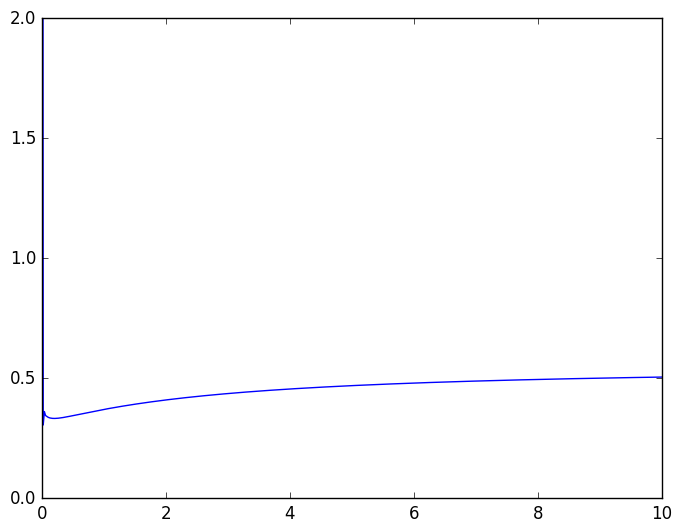

4-element Array{Int64,1}:
  0
 10
  0
  2

In [96]:
mat = mat_baseline
range = 1:nsteps
tbyT = (mat[range,1]-mat[range[1]])/T
plot(tbyT,mat[range,6])
axis([0, 10, 0, 2])



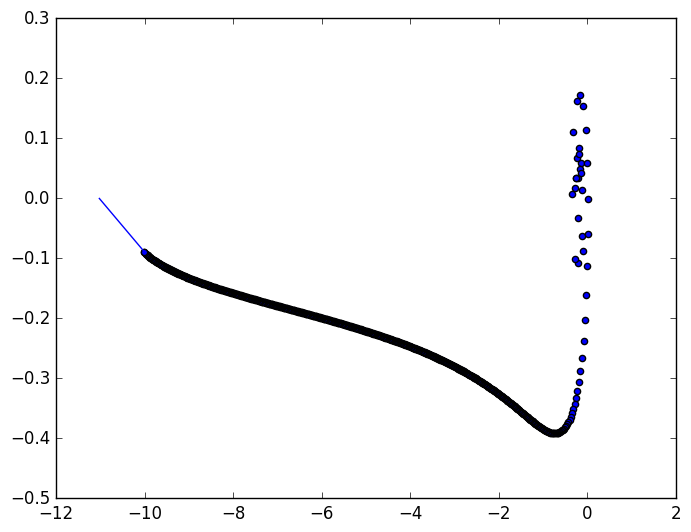

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31c47b310>

In [91]:
surf = surf_baseline
curfield = curfield_baseline
view_vorts(surf, curfield)


In [107]:
range=round(nsteps/2):nsteps
#Add a value to drag to compensate for skin-friction and bring in line with Krus results
mean(mat_baseline[range,6]), mean(mat_baseline[range,7]+0.06), mean(mat_baseline[range,6]./(mat_baseline[range,7]+0.06))

(0.5016488252905674,0.06374927233093731,7.871414922501216)

### Study in more detail : Batch runs to see the effect of each individual parameter

The parameters that need to be studied are : $u_{amp}$, $u_\omega$, $w_{amp}$, $w_\omega$, $w_\phi$

We are interested in freestream turbulence. The implication is that the oscillations are high frequency. Let the frequency start from 1 onwards($\omega = 2\pi f$), up to 20.





Let the amplitude vary from 1$\%$ of freestream to 50$\%$ of freestream 

To check: Average value of Cl
Average value of Cd (add a value of 0.06 to compensate for skin-friction, finite wing effects and bring in line with Krus result)

Study 1: 
alpha = 1 to alpha = 10 (with and without w_amp = 0.03, w_f = 5)


Study 2: 
alpha = 1 to alpha = 10 (with and without u_amp = 0.03, u_f = 5)


Study 3:
alpha = 5, w_amp = 0.01, 0.03, 0.05:0.05:0.5, w_f = 5


Study 4:
alpha = 5, u_amp = 0.01, 0.03, 0.05:0.05:0.5, u_f = 5


Study 5:
alpha = 5, w_amp = 0.03, w_f = 1, 3, 5:5:20 


Study 6:
alpha = 5, u_amp = 0.03, u_f = 1, 3, 5:5:20 


Study 7:
alpha = 5, u_amp = 0.03, u_f = 5, w_amp = 0.03, w_f = 5, w_phi = 0:10:90 

